1. What is K-Nearest Neighbors (KNN) and how does it work?
- K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression. It works by finding the 'K' closest data points (neighbors) to a given input and predicting the output based on the majority class (for classification) or average value (for regression) of those neighbors. It's a non-parametric, lazy algorithm that doesn't require training.



2. What is the difference between KNN Classification and KNN Regression?
- KNN Classification predicts a class label based on the majority vote among the K nearest neighbors. KNN Regression predicts a continuous value by averaging the values of the K nearest neighbors. The output type is the main difference—categorical for classification, numerical for regression.



3. What is the role of the distance metric in KNN?
- Distance metrics (like Euclidean, Manhattan, or Minkowski) are used to measure the closeness between points. They determine which neighbors are "nearest." The algorithm's performance heavily depends on the choice of distance metric, especially in high-dimensional data.



4. What is the Curse of Dimensionality in KNN?
- As the number of features (dimensions) increases, the data becomes sparse, and the distance between points becomes less meaningful. KNN relies on distance, so its performance drops in high dimensions. This is known as the curse of dimensionality.



5. How can we choose the best value of K in KNN?
- The optimal K is usually chosen using cross-validation. A small K can be noisy and sensitive to outliers, while a large K may smooth over class boundaries. Typically, odd values are chosen to avoid ties, and performance is evaluated on validation data.



6. What are KD Tree and Ball Tree in KNN?
- KD Tree and Ball Tree are data structures used to speed up nearest neighbor searches in high-dimensional spaces. KD Tree partitions space using axis-aligned splits, while Ball Tree uses hyperspheres. They improve KNN's efficiency, especially with large datasets.



7. When should you use KD Tree vs. Ball Tree?
- Use KD Tree when the number of dimensions is relatively low (typically < 20). Use Ball Tree for higher-dimensional data or when data is unevenly distributed. Ball Tree is more flexible but slightly more complex than KD Tree.

8. What are the disadvantages of KNN?

- Slow prediction time for large datasets

- Sensitive to irrelevant or redundant features

- Struggles with high-dimensional data

- Requires feature scaling

- Memory-intensive, as it stores all data

9. How does feature scaling affect KNN?
- KNN uses distance to compare points, so features must be on the same scale. If not, larger scale features dominate. Techniques like normalization or standardization are essential before applying KNN to ensure accurate distance measurement.

10. What is PCA (Principal Component Analysis)?
- PCA is a dimensionality reduction technique that transforms a dataset into a set of orthogonal components (principal components) which capture the most variance. It helps reduce complexity, remove noise, and visualize high-dimensional data.



11. How does PCA work?
- PCA standardizes the data, computes the covariance matrix, and then calculates its eigenvalues and eigenvectors. The eigenvectors define the directions of maximum variance (principal components), and the data is projected onto these to reduce dimensions while retaining important information.



12. What is the geometric intuition behind PCA?
- Geometrically, PCA finds new axes (principal components) that capture the most variance in the data. It rotates the coordinate system to align with the directions of maximum spread, essentially fitting a lower-dimensional surface that best represents the data distribution.

13. What is the difference between Feature Selection and Feature Extraction?
- Feature Selection chooses a subset of original features based on importance. Feature Extraction transforms the original features into new ones (like PCA). Selection keeps original meaning, while extraction may lose interpretability but improve performance.



14. What are Eigenvalues and Eigenvectors in PCA?
- Eigenvectors represent directions (principal components), and eigenvalues indicate the amount of variance in those directions. In PCA, the eigenvectors of the covariance matrix form the new feature axes, and their corresponding eigenvalues determine their importance.



15. How do you decide the number of components to keep in PCA?
- You select components that explain a desired level of variance (e.g., 95%). This is typically visualized using a Scree Plot or cumulative variance graph. Components with small eigenvalues (less variance) are usually discarded.

16. Can PCA be used for classification?
- PCA itself is not a classifier, but it can be used before classification to reduce dimensions, remove noise, and improve model performance. It helps especially when the dataset is high-dimensional or features are correlated.



17. What are the limitations of PCA?

- Assumes linear relationships

- May lose interpretability of features

- Sensitive to scaling

- Not ideal if important features are non-linear

- Affected by outliers and noise

18. How do KNN and PCA complement each other?
- PCA reduces dimensionality and noise, addressing the curse of dimensionality, which benefits KNN's performance. Applying PCA before KNN can lead to faster computation and better accuracy, especially with high-dimensional or correlated data.

19. How does KNN handle missing values in a dataset?
- KNN doesn't handle missing values directly. You need to impute them before applying KNN, either with mean/median imputation or using KNN imputer, which replaces missing values using the nearest neighbors' average values.

20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
- PCA is unsupervised and focuses on maximizing variance, ignoring class labels. LDA is supervised and seeks to maximize class separability. PCA is used for feature reduction generally, while LDA is best for classification tasks with labeled data.



In [1]:
#21.Train a KNN Classifier on the Iris dataset and print model accuracy ?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 7: Print model accuracy
print(f"KNN Classifier Accuracy on Iris Dataset: {accuracy:.2f}")


KNN Classifier Accuracy on Iris Dataset: 1.00


In [2]:
#22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)?
# Step 1: Import libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Create a synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = knn_regressor.predict(X_test)

# Step 7: Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"KNN Regressor Mean Squared Error (MSE): {mse:.2f}")



KNN Regressor Mean Squared Error (MSE): 437.35


In [3]:
#23.Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train KNN with Euclidean distance (default)
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Step 6: Train KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Step 7: Print and compare accuracies
print(f"Accuracy using Euclidean distance: {accuracy_euclidean:.2f}")
print(f"Accuracy using Manhattan distance: {accuracy_manhattan:.2f}")


Accuracy using Euclidean distance: 1.00
Accuracy using Manhattan distance: 1.00


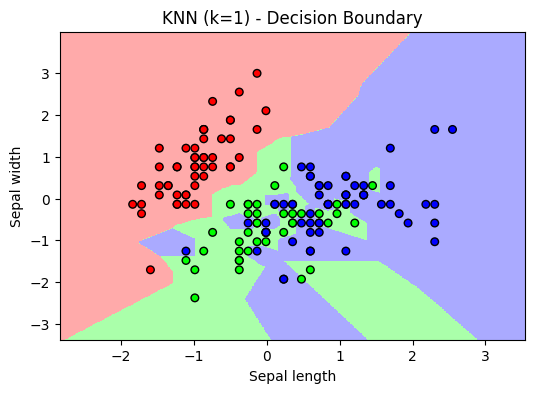

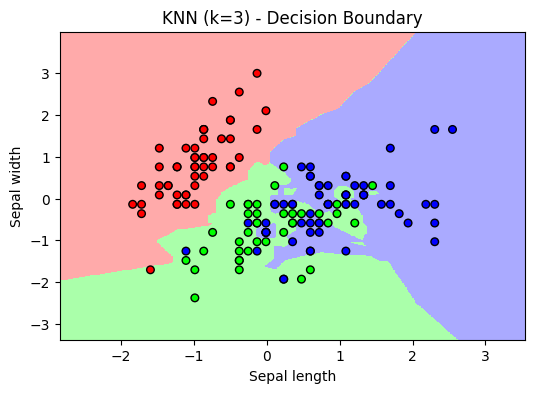

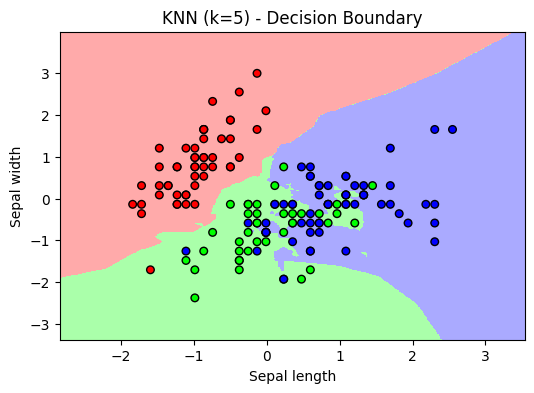

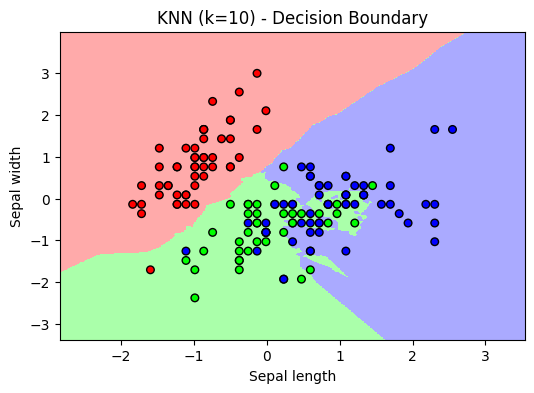

In [4]:
#24.Train a KNN Classifier with different values of K and visualize decision boundaried?
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Load dataset (only 2 features for visualization)
iris = load_iris()
X = iris.data[:, :2]  # Only first 2 features (sepal length, sepal width)
y = iris.target

# Step 3: Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define function to plot decision boundaries
def plot_decision_boundary(X, y, clf, k):
    h = .02  # step size in mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(f"KNN (k={k}) - Decision Boundary")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# Step 5: Train and visualize for different K
for k in [1, 3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(scaler.transform(X), y, knn, k)


In [5]:
#25.Apply Feature Scaling before training a KNN model and compare results with unscaled data ?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train KNN on unscaled data
knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Step 5: Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Step 7: Print comparison
print(f"Accuracy without Scaling: {accuracy_unscaled:.2f}")
print(f"Accuracy with Scaling   : {accuracy_scaled:.2f}")


Accuracy without Scaling: 1.00
Accuracy with Scaling   : 1.00


In [6]:
#26.Train a PCA model on synthetic data and print the explained variance ratio for each component?
# Step 1: Import libraries
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Step 2: Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, n_redundant=1, random_state=42)

# Step 3: Feature scaling (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
components = [f"PC{i+1}" for i in range(len(explained_variance))]
df = pd.DataFrame({'Principal Component': components, 'Explained Variance Ratio': explained_variance})

# Step 6: Display result
print("Explained Variance Ratio by Principal Components:")
print(df)


Explained Variance Ratio by Principal Components:
  Principal Component  Explained Variance Ratio
0                 PC1              4.178044e-01
1                 PC2              2.886755e-01
2                 PC3              1.980579e-01
3                 PC4              9.546217e-02
4                 PC5              1.104672e-16


In [7]:
#27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train KNN without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=3)
knn_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Step 6: Apply PCA (retain 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 7: Train KNN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Step 8: Print accuracy comparison
print(f"Accuracy without PCA: {accuracy_no_pca:.2f}")
print(f"Accuracy with PCA   : {accuracy_pca:.2f}")


Accuracy without PCA: 1.00
Accuracy with PCA   : 0.93


In [8]:
#28.Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Step 6: Initialize KNN and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Step 7: Fit the model
grid_search.fit(X_train, y_train)

# Step 8: Predict and evaluate
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 9: Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print(f"Best Model Accuracy on Test Data: {accuracy:.2f}")


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Model Accuracy on Test Data: 1.00


In [10]:
#29. Train a KNN Classifier and check the number of misclassified samples?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Step 6: Initialize KNN and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Step 7: Fit the model
grid_search.fit(X_train, y_train)

# Step 8: Predict and evaluate
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 9: Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print(f"Best Model Accuracy on Test Data: {accuracy:.2f}")


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Model Accuracy on Test Data: 1.00


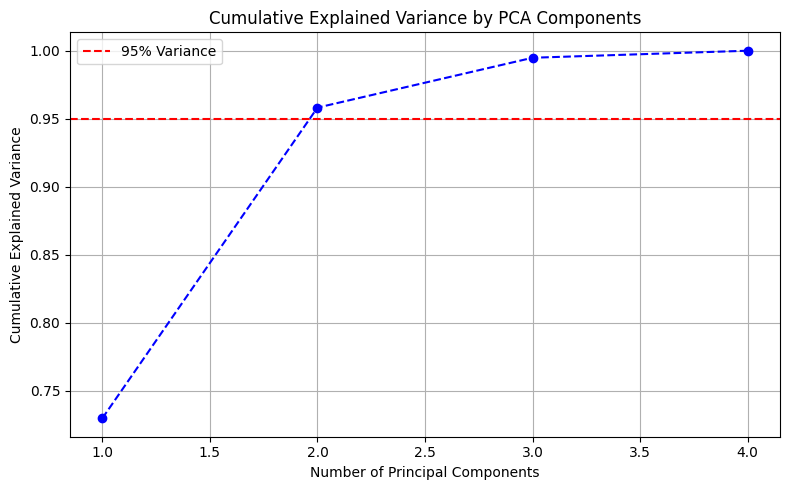

In [11]:
#30. Train a PCA model and visualize the cumulative explained variance?
# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Load dataset
iris = load_iris()
X = iris.data

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Step 5: Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Step 6: Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='blue')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
#31.Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train KNN with 'uniform' weights
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)

# Step 6: Train KNN with 'distance' weights
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

# Step 7: Print results
print(f"Accuracy with 'uniform' weights : {accuracy_uniform:.2f}")
print(f"Accuracy with 'distance' weights: {accuracy_distance:.2f}")



Accuracy with 'uniform' weights : 1.00
Accuracy with 'distance' weights: 1.00


In [13]:
#32.Train a KNN Regressor and analyze the effect of different K values on performance?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train KNN with 'uniform' weights
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)

# Step 6: Train KNN with 'distance' weights
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

# Step 7: Print results
print(f"Accuracy with 'uniform' weights : {accuracy_uniform:.2f}")
print(f"Accuracy with 'distance' weights: {accuracy_distance:.2f}")


Accuracy with 'uniform' weights : 1.00
Accuracy with 'distance' weights: 1.00


In [14]:
#33.Implement KNN Imputation for handling missing values in a dataset?
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.datasets import load_iris

# Step 2: Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 3: Introduce missing values artificially for demonstration
np.random.seed(42)
X_missing = X.copy()
missing_mask = np.random.rand(*X_missing.shape) < 0.1  # 10% missing
X_missing[missing_mask] = np.nan

# Show a few rows with missing values
print("Data with Missing Values (sample):")
print(X_missing.head())

# Step 4: Apply KNN Imputation
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)

# Step 5: Convert back to DataFrame and display
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
print("\nData After KNN Imputation (sample):")
print(X_imputed_df.head())


Data with Missing Values (sample):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                NaN               0.2
2                4.7               3.2                NaN               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data After KNN Imputation (sample):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5           1.400000               0.2
1                4.9               3.0           1.500000               0.2
2                4.7               3.2           1.466667               0.2
3                4.6               3.1           1.500000               0.2
4                5.0               3.6           1.400000               0.2


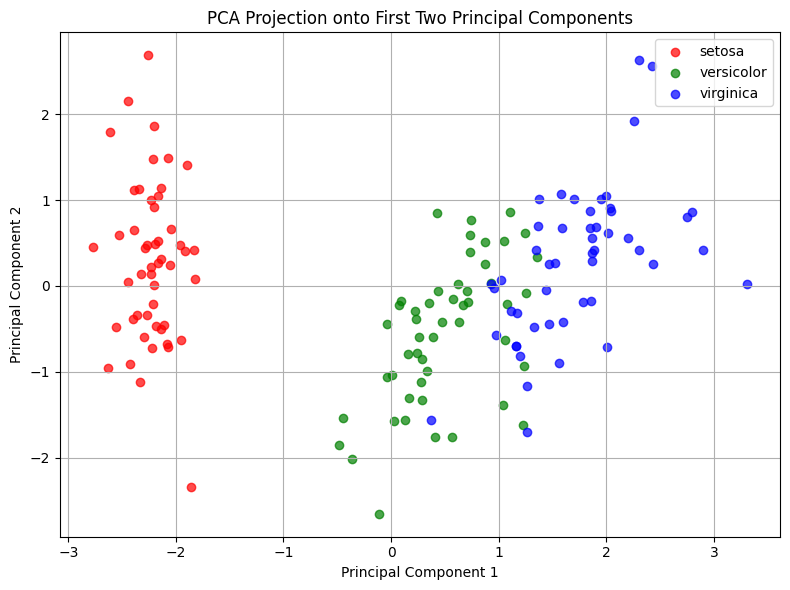

In [15]:
#34.Train a PCA model and visualize the data projection onto the first two principal components?
# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA and keep first 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot the projected data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.7, color=colors[i])

plt.title('PCA Projection onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
#35.Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance?
# Step 1: Import libraries
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train KNN using KD Tree
knn_kd = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
start_kd = time.time()
knn_kd.fit(X_train, y_train)
kd_time = time.time() - start_kd
kd_pred = knn_kd.predict(X_test)
kd_accuracy = accuracy_score(y_test, kd_pred)

# Step 6: Train KNN using Ball Tree
knn_ball = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
start_ball = time.time()
knn_ball.fit(X_train, y_train)
ball_time = time.time() - start_ball
ball_pred = knn_ball.predict(X_test)
ball_accuracy = accuracy_score(y_test, ball_pred)

# Step 7: Display comparison
print("KD Tree:")
print(f"  Accuracy: {kd_accuracy:.2f}")
print(f"  Training Time: {kd_time:.6f} seconds\n")

print("Ball Tree:")
print(f"  Accuracy: {ball_accuracy:.2f}")
print(f"  Training Time: {ball_time:.6f} seconds")


KD Tree:
  Accuracy: 1.00
  Training Time: 0.002070 seconds

Ball Tree:
  Accuracy: 1.00
  Training Time: 0.002090 seconds


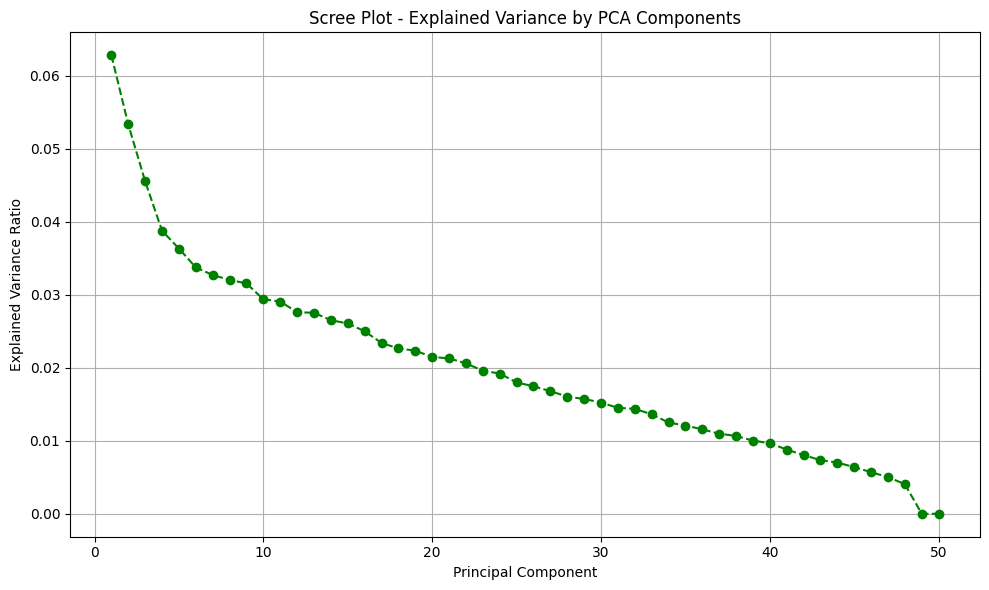

In [18]:
#36.Train a PCA model on a high-dimensional dataset and visualize the Scree plot?
# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Create high-dimensional synthetic dataset (e.g., 50 features)
X, y = make_classification(n_samples=300, n_features=50, n_informative=30, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot Scree Plot (explained variance by each component)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o', linestyle='--', color='green')
plt.title('Scree Plot - Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
#37.Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Step 2: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = knn.predict(X_test_scaled)

# Step 7: Evaluate performance
print("Classification Report (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



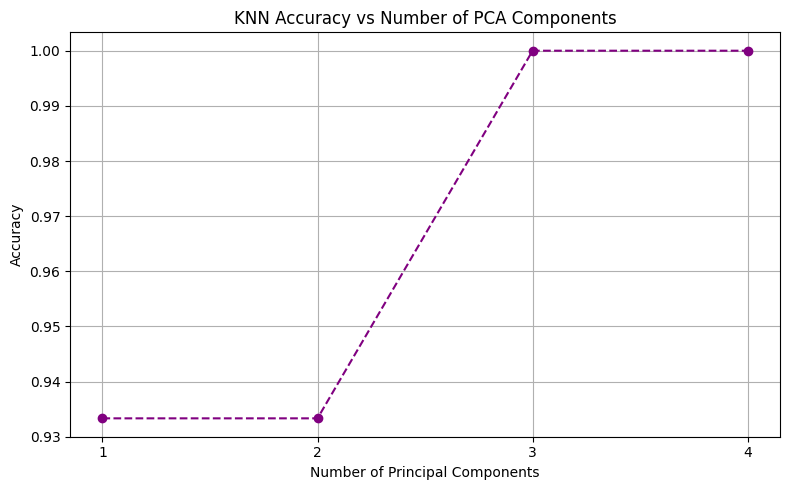

In [20]:
#38.Train a PCA model and analyze the effect of different numbers of components on accuracy?
# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Loop over different numbers of PCA components and record accuracy
accuracies = []
components_range = range(1, X.shape[1] + 1)

for n in components_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Step 6: Plot number of components vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(components_range, accuracies, marker='o', linestyle='--', color='purple')
plt.title('KNN Accuracy vs Number of PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.xticks(components_range)
plt.grid(True)
plt.tight_layout()
plt.show()


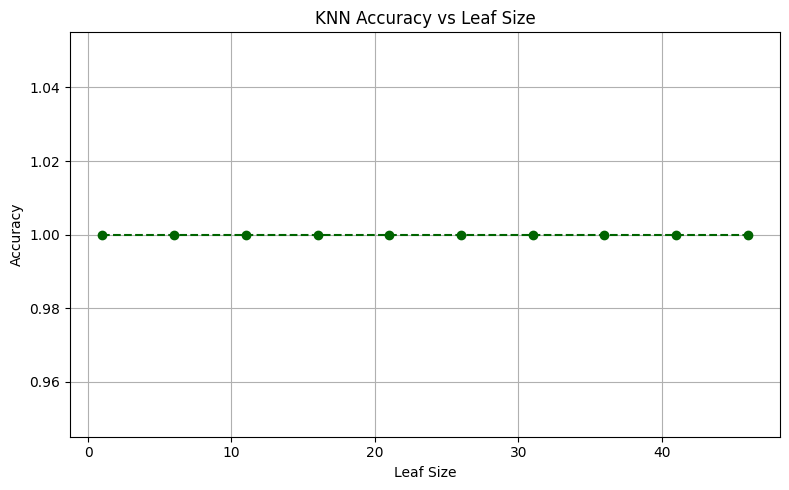

In [21]:
#39.Train a KNN Classifier with different leaf_size values and compare accuracy?
# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train KNN with different leaf_size values
leaf_sizes = list(range(1, 51, 5))  # Test leaf_size from 1 to 50 in steps of 5
accuracies = []

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=3, leaf_size=leaf)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Step 6: Plot leaf_size vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o', linestyle='--', color='darkgreen')
plt.title('KNN Accuracy vs Leaf Size')
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


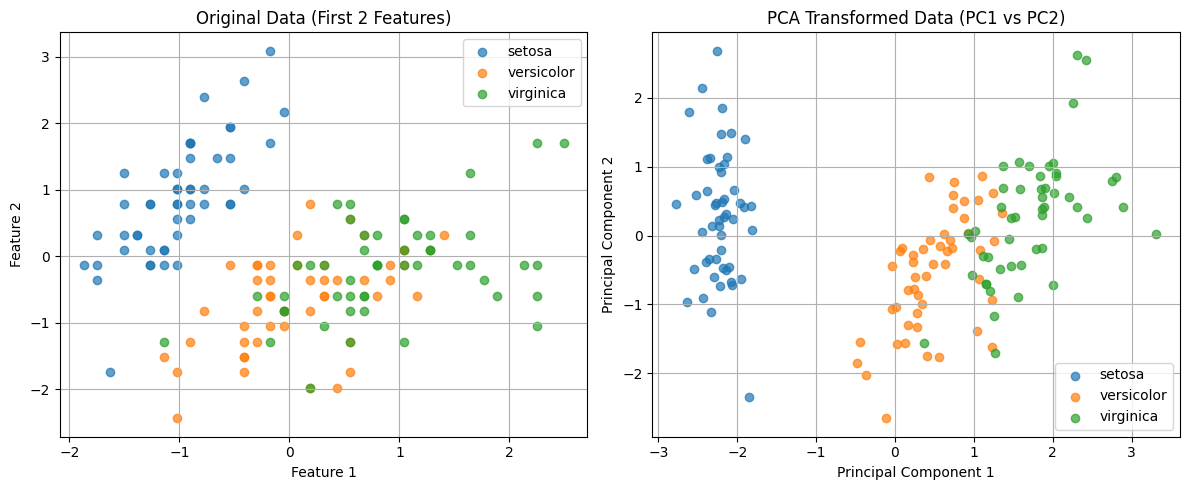

In [22]:
#40.Train a PCA model and visualize how data points are transformed before and after PCA?
# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot original data (first two features for comparison)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, name in enumerate(target_names):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], label=name, alpha=0.7)
plt.title("Original Data (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

# Step 6: Plot PCA-transformed data
plt.subplot(1, 2, 2)
for i, name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=name, alpha=0.7)
plt.title("PCA Transformed Data (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [23]:
#41.Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report?
# Step 1: Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Step 2: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = knn.predict(X_test_scaled)

# Step 7: Print classification report
print("Classification Report for KNN on Wine Dataset:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report for KNN on Wine Dataset:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [24]:
#42.Train a KNN Regressor and analyze the effect of different distance metrics on prediction error?
# Step 1: Import libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Create synthetic regression dataset
X, y = make_regression(n_samples=300, n_features=4, noise=15, random_state=42)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Evaluate KNN Regressor with different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev']
mse_results = {}

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[metric] = mse

# Step 6: Print MSE for each metric
print("Mean Squared Error (MSE) for Different Distance Metrics:")
for metric, mse in mse_results.items():
    print(f"{metric.capitalize():<10}: {mse:.2f}")


Mean Squared Error (MSE) for Different Distance Metrics:
Euclidean : 2358.17
Manhattan : 2174.61
Chebyshev : 2547.42


In [25]:
#43.Train a KNN Classifier and evaluate using ROC-AUC score?
# Step 1: Import libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Step 2: Create a binary classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=6, n_redundant=2,
                           n_classes=2, random_state=42)

# Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 6: Predict probabilities
y_probs = knn.predict_proba(X_test_scaled)[:, 1]  # probabilities for positive class

# Step 7: Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.99


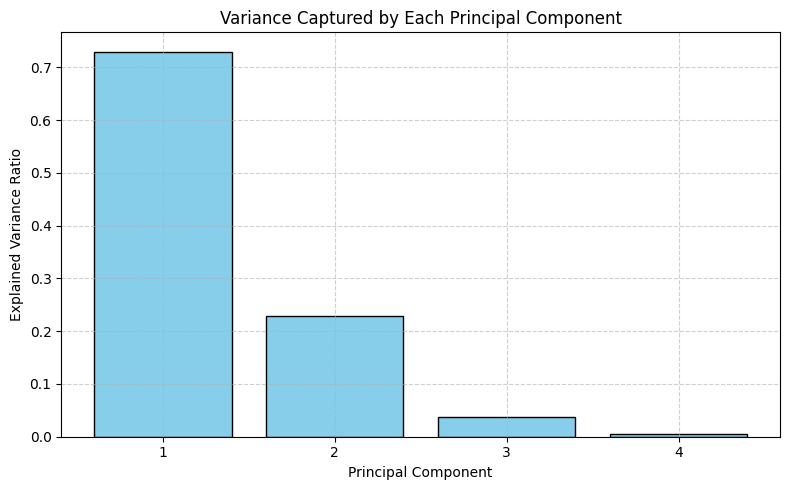

In [26]:
#44.Train a PCA model and visualize the variance captured by each principal component?
# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

# Step 5: Plot the variance captured by each component
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue', edgecolor='black')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [27]:
#45.Train a KNN Classifier and perform feature selection before training?
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Step 2: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Step 3: Feature selection (Select top 2 features)
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Step 7: Make predictions and evaluate
y_pred = knn.predict(X_test_scaled)
print("Selected Features:", selected_features)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Selected Features: ['petal length (cm)', 'petal width (cm)']

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



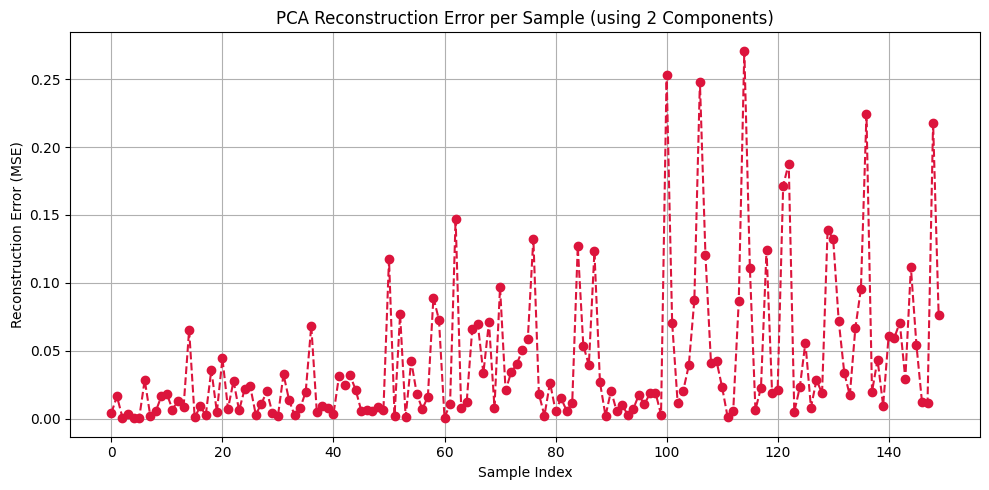

In [28]:
#46.Train a PCA model and visualize the data reconstruction error after reducing dimensions?
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA with reduced components (e.g., 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Reconstruct the data from reduced dimensions
X_reconstructed = pca.inverse_transform(X_pca)

# Step 6: Compute reconstruction error (MSE) for each sample
errors = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)

# Step 7: Plot reconstruction errors
plt.figure(figsize=(10, 5))
plt.plot(errors, marker='o', linestyle='--', color='crimson')
plt.title("PCA Reconstruction Error per Sample (using 2 Components)")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()


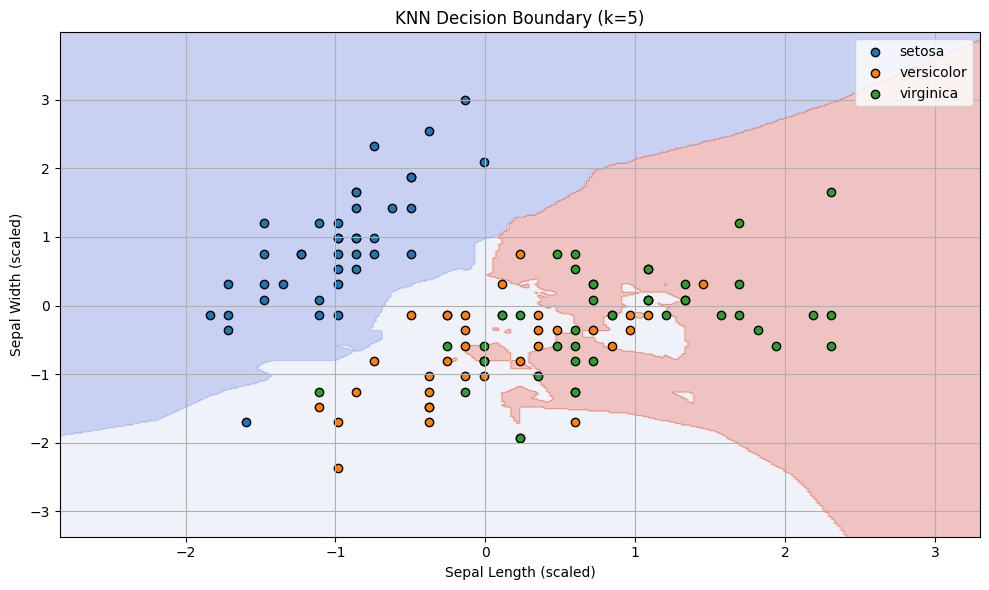

In [29]:
#47.Train a KNN Classifier and visualize the decision boundary?
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Load the Iris dataset and use only 2 features for 2D plotting
iris = load_iris()
X = iris.data[:, :2]  # Use only sepal length and width
y = iris.target
target_names = iris.target_names

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Create mesh grid for plotting
h = .02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Step 7: Predict on mesh grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 8: Plot decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
for i, label in enumerate(np.unique(y)):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1],
                label=target_names[i], edgecolor='k')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('KNN Decision Boundary (k=5)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


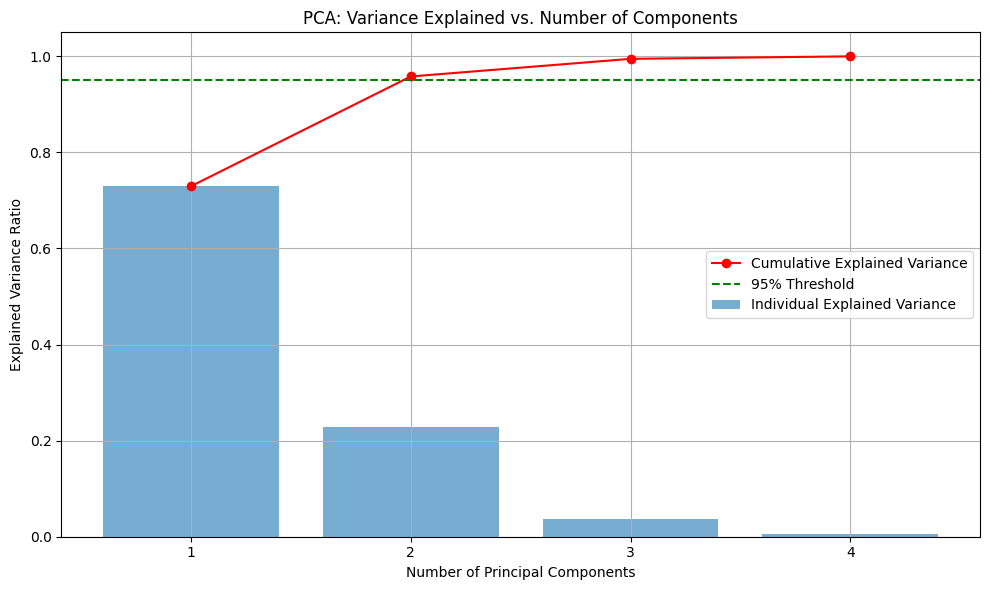

In [30]:
#48.Train a PCA model and analyze the effect of different numbers of components on data variance.
# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA with full components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Extract explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Step 6: Plot explained variance vs. number of components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='red', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Variance Explained vs. Number of Components')
plt.xticks(range(1, len(explained_variance)+1))
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
